https://stackoverflow.com/questions/63620195/kraken-api-for-ohlc-data-to-only-append-latest-entries

cryptos available on kraken:
https://support.kraken.com/hc/en-us/articles/360000678446

In [6]:
# documentation
help(KrakenAPI)

Help on class KrakenAPI in module pykrakenapi.pykrakenapi:

class KrakenAPI(builtins.object)
 |  KrakenAPI(api, tier='Intermediate', retry=1, crl_sleep=5)
 |  
 |  A python implementation of the Kraken API.
 |  
 |  Implements the Kraken API methods using the low-level krakenex python
 |  package. See
 |  https://www.kraken.com/help/api
 |  and
 |  https://github.com/veox/python3-krakenex
 |  
 |  Parameters
 |  ----------
 |  api : krakenex.API
 |      An instance of the krakenex.API class. A reference to the input
 |      is created and accessible via ``KrakenAPI.api``.
 |  
 |  tier : str, optional (default='Intermediate')
 |      Your Kraken tier level, used to adjust the limit of the call rate to
 |      the Kraken API in order to prevent 15 minute temporary lockouts.
 |      Must be one of {'None', 'Starter', 'Intermediate', 'Pro'}.
 |      Set tier='None' to disable the call rate limiter.
 |      See https://support.kraken.com/hc/en-us/articles/206548367.
 |  
 |  retry : float,

Time interval for call defaults to one minutes.

There are 1440 minutes in a day (60 minutes * 24hrs).

Set interval parameter in get_ohlc_data to 1440 for daily prices

In [1]:
import krakenex
from pykrakenapi import KrakenAPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
api = krakenex.API()

k = KrakenAPI(api)

ohlc, last = k.get_ohlc_data("BCHUSD")

print(ohlc)

                           time   open   high    low  close   vwap  \
dtime                                                                
2020-09-15 22:34:00  1600209240  235.2  235.2  235.2  235.2    0.0   
2020-09-15 22:33:00  1600209180  235.2  235.2  235.2  235.2    0.0   
2020-09-15 22:32:00  1600209120  235.3  235.3  235.2  235.2  235.2   
2020-09-15 22:31:00  1600209060  235.3  235.3  235.3  235.3    0.0   
2020-09-15 22:30:00  1600209000  235.3  235.3  235.3  235.3    0.0   
...                         ...    ...    ...    ...    ...    ...   
2020-09-15 10:39:00  1600166340  235.7  237.4  235.7  237.4  237.3   
2020-09-15 10:38:00  1600166280  235.7  235.7  235.7  235.7    0.0   
2020-09-15 10:37:00  1600166220  235.7  235.7  235.7  235.7    0.0   
2020-09-15 10:36:00  1600166160  235.7  235.7  235.7  235.7    0.0   
2020-09-15 10:35:00  1600166100  234.9  235.7  234.9  235.7  235.0   

                         volume  count  
dtime                                   
2020-09

In [3]:
ohlc, last = k.get_ohlc_data("BTCUSD")

print(ohlc)

                           time     open     high      low    close     vwap  \
dtime                                                                          
2020-09-15 22:34:00  1600209240  10834.0  10834.0  10834.0  10834.0  10834.0   
2020-09-15 22:33:00  1600209180  10834.7  10834.8  10834.7  10834.7  10834.7   
2020-09-15 22:32:00  1600209120  10834.7  10834.7  10834.7  10834.7  10834.7   
2020-09-15 22:31:00  1600209060  10837.1  10837.1  10834.8  10834.8  10836.0   
2020-09-15 22:30:00  1600209000  10835.0  10837.1  10835.0  10837.1  10837.1   
...                         ...      ...      ...      ...      ...      ...   
2020-09-15 10:39:00  1600166340  10740.0  10797.0  10740.0  10788.4  10773.7   
2020-09-15 10:38:00  1600166280  10735.1  10736.1  10722.8  10736.1  10730.4   
2020-09-15 10:37:00  1600166220  10735.1  10735.2  10735.1  10735.1  10735.1   
2020-09-15 10:36:00  1600166160  10735.1  10739.0  10735.1  10739.0  10736.2   
2020-09-15 10:35:00  1600166100  10728.0

In [5]:
ohlc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15 22:34:00,1600209240,10834.0,10834.0,10834.0,10834.0,10834.0,0.383000,1
2020-09-15 22:33:00,1600209180,10834.7,10834.8,10834.7,10834.7,10834.7,0.190981,8
2020-09-15 22:32:00,1600209120,10834.7,10834.7,10834.7,10834.7,10834.7,0.004830,2
2020-09-15 22:31:00,1600209060,10837.1,10837.1,10834.8,10834.8,10836.0,0.255609,2
2020-09-15 22:30:00,1600209000,10835.0,10837.1,10835.0,10837.1,10837.1,0.089734,3


In [6]:
del ohlc['time']

In [7]:
ohlc.head()

,open,high,low,close,vwap,volume,count
dtime,,,,,,,
2020-09-15 22:34:00,10834.0,10834.0,10834.0,10834.0,10834.0,0.383000,1
2020-09-15 22:33:00,10834.7,10834.8,10834.7,10834.7,10834.7,0.190981,8
2020-09-15 22:32:00,10834.7,10834.7,10834.7,10834.7,10834.7,0.004830,2
2020-09-15 22:31:00,10837.1,10837.1,10834.8,10834.8,10836.0,0.255609,2
2020-09-15 22:30:00,10835.0,10837.1,10835.0,10837.1,10837.1,0.089734,3


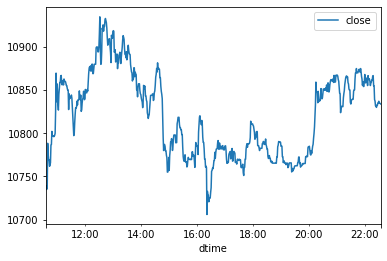

In [8]:
ohlc.plot(y='close')

In [4]:
ohlc, last = k.get_ohlc_data("ETHUSD")

In [5]:
ohlc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15 21:52:00,1600206720,368.40,368.40,368.10,368.10,368.12,157.00000,16
2020-09-15 21:51:00,1600206660,367.98,368.72,367.98,368.42,368.50,124.38462,44
2020-09-15 21:50:00,1600206600,367.85,367.98,367.50,367.98,367.77,5.80732,6
2020-09-15 21:49:00,1600206540,367.65,367.85,367.65,367.85,367.73,5.00000,7
2020-09-15 21:48:00,1600206480,367.63,367.72,367.52,367.58,367.63,262.62153,28


In [9]:
ohlc, last = k.get_ohlc_data("XRPUSD")

In [10]:
ohlc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15 22:37:00,1600209420,0.24440,0.24440,0.24440,0.24440,0.00000,0.00000,0
2020-09-15 22:36:00,1600209360,0.24440,0.24440,0.24440,0.24440,0.00000,0.00000,0
2020-09-15 22:35:00,1600209300,0.24416,0.24440,0.24416,0.24440,0.24436,21000.00000,9
2020-09-15 22:34:00,1600209240,0.24438,0.24438,0.24415,0.24415,0.24415,172.15231,1
2020-09-15 22:33:00,1600209180,0.24438,0.24438,0.24438,0.24438,0.00000,0.00000,0


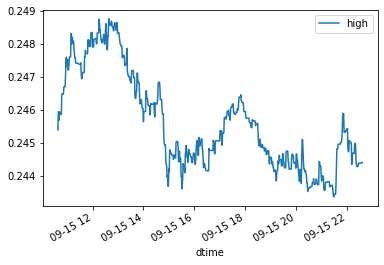

In [12]:
ohlc.plot(y='high')

In [15]:
ohlc, last = k.get_ohlc_data("BTCUSD", interval=1440)

In [16]:
ohlc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,10675.0,10935.0,10620.0,10842.5,10790.8,4075.096469,16368
2020-09-14,1600041600,10328.2,10740.3,10251.2,10674.9,10547.5,3742.152534,14199
2020-09-13,1599955200,10447.5,10573.0,10217.2,10328.2,10382.5,2427.791967,9501
2020-09-12,1599868800,10398.1,10475.0,10280.0,10447.5,10390.8,2068.365993,8651
2020-09-11,1599782400,10350.0,10411.3,10210.0,10398.2,10303.7,2682.488752,11596


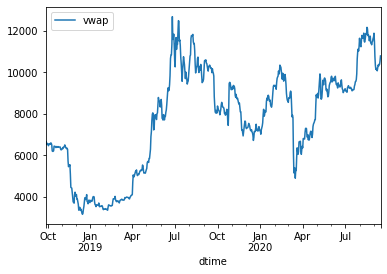

In [17]:
ohlc.plot(y='vwap')

In [24]:
ohlc, last = k.get_ohlc_data("BCHUSD", interval = 1440)

In [25]:
type(ohlc)

pandas.core.frame.DataFrame

In [26]:
ohlc

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,225.7,241.7,225.3,235.7,235.9,7012.973721,1793
2020-09-14,1600041600,222.3,228.7,219.5,225.7,225.0,4036.146636,946
2020-09-13,1599955200,230.5,234.6,219.5,222.1,225.9,2811.095487,906
2020-09-12,1599868800,225.4,230.5,222.7,230.5,226.3,1612.090852,601
2020-09-11,1599782400,227.2,228.3,220.6,225.4,223.9,1935.823040,835
...,...,...,...,...,...,...,...,...
2018-10-01,1538352000,530.1,542.0,520.6,530.4,535.0,2736.152176,1139
2018-09-30,1538265600,535.8,548.4,515.7,530.1,530.5,1445.820027,1031
2018-09-29,1538179200,539.8,557.9,510.2,537.8,529.6,2306.113364,1323


In [29]:
ohlc = ohlc.drop(['time'], axis=1)

In [30]:
ohlc.head()

,open,high,low,close,vwap,volume,count
dtime,,,,,,,
2020-09-15,225.7,241.7,225.3,235.7,235.9,7012.973721,1793
2020-09-14,222.3,228.7,219.5,225.7,225.0,4036.146636,946
2020-09-13,230.5,234.6,219.5,222.1,225.9,2811.095487,906
2020-09-12,225.4,230.5,222.7,230.5,226.3,1612.090852,601
2020-09-11,227.2,228.3,220.6,225.4,223.9,1935.823040,835


In [31]:
ltc, last = k.get_ohlc_data('LTCUSD', interval=1440)

In [32]:
ltc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,49.09,50.31,48.40,48.61,49.06,29089.360196,1991
2020-09-14,1600041600,48.16,49.61,47.16,49.09,48.31,22875.994964,1832
2020-09-13,1599955200,50.82,50.94,47.30,48.17,49.13,23571.989664,1572
2020-09-12,1599868800,48.98,51.31,48.43,50.82,49.86,14343.969944,1087
2020-09-11,1599782400,48.70,49.35,47.41,48.98,48.51,14144.591784,1326


In [37]:
xtz, last = k.get_ohlc_data('XTZUSD', interval=1440)

In [38]:
xtz.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,2.6123,2.6768,2.5003,2.5255,2.5925,425878.004339,1847
2020-09-14,1600041600,2.6228,2.6970,2.5401,2.6123,2.6110,472667.276227,1547
2020-09-13,1599955200,2.5998,2.7400,2.5352,2.6234,2.6146,370106.016988,1818
2020-09-12,1599868800,2.5732,2.6380,2.4921,2.5998,2.5590,377244.932999,1779
2020-09-11,1599782400,2.5781,2.6241,2.4750,2.5732,2.5387,459275.460120,2205


In [39]:
link, last = k.get_ohlc_data("LINKUSD", interval=1440)

In [40]:
link.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,12.13097,12.24021,11.05938,11.07000,11.63256,587495.184220,5188
2020-09-14,1600041600,12.04997,12.40467,11.65000,12.13097,12.06205,369348.534241,3768
2020-09-13,1599955200,12.71728,13.20258,11.76000,12.07570,12.29035,457684.013339,5017
2020-09-12,1599868800,12.46783,13.03000,12.10321,12.71728,12.44132,305402.233821,3090
2020-09-11,1599782400,12.51968,12.67500,12.03826,12.46783,12.39257,425136.623786,4097


In [41]:
data = pd.merge(xtz, link, on='time')

In [42]:
data.head()

,time,open_x,high_x,low_x,close_x,vwap_x,volume_x,count_x,open_y,high_y,low_y,close_y,vwap_y,volume_y,count_y
0,1600128000,2.6123,2.6768,2.5003,2.5255,2.5925,425878.004339,1847,12.13097,12.24021,11.05938,11.07000,11.63256,587495.184220,5188
1,1600041600,2.6228,2.6970,2.5401,2.6123,2.6110,472667.276227,1547,12.04997,12.40467,11.65000,12.13097,12.06205,369348.534241,3768
2,1599955200,2.5998,2.7400,2.5352,2.6234,2.6146,370106.016988,1818,12.71728,13.20258,11.76000,12.07570,12.29035,457684.013339,5017
3,1599868800,2.5732,2.6380,2.4921,2.5998,2.5590,377244.932999,1779,12.46783,13.03000,12.10321,12.71728,12.44132,305402.233821,3090
4,1599782400,2.5781,2.6241,2.4750,2.5732,2.5387,459275.460120,2205,12.51968,12.67500,12.03826,12.46783,12.39257,425136.623786,4097


In [43]:
df = pd.concat([ltc, link, xtz])

In [44]:
df.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-15,1600128000,377.14,382.48,362.50,365.27,372.63,72700.549989,14283
2020-09-14,1600041600,366.51,384.15,356.15,377.14,370.49,71811.180112,14122
2020-09-13,1599955200,387.94,390.00,353.50,366.41,369.92,87789.551251,14501
2020-09-12,1599868800,373.88,388.00,365.31,387.91,376.46,48281.889669,10050
2020-09-11,1599782400,367.98,375.29,355.64,373.88,366.22,59017.278329,12556


In [83]:
def merge_data(dfs):
    '''
    Merge dataframes on time column to have all desired cryptos in one data
    frame.
    '''
    df_merged = reduce(lambda left, right: pd.merge(left, right, 
                                                    on=['time'],
                                                   how='outer'),
                      dfs)
    df_merged.index = dfs[0].index
    return df_merged
    

In [107]:
def pull_data(ticker, interval = 1440):
    '''
    Pull the data for different cryptos from Kraken API. Interval default
    value is set to daily prices.
    '''
    ticker_str = '_'+str(ticker)
    
    ticker, last = k.get_ohlc_data(str(ticker)+'USD', interval)
    
    col_names = ['time']
    
    for i in ticker.columns:
        if i != 'time':
            col_names.append(i+ticker_str)
    
    ticker.columns = col_names
    
    return ticker

In [52]:
coins = ['BTC', 'BCH', 'ETH', 'LINK', 'LTC']        

In [58]:
# this might not work
'''
for coin in coins:
    pull_data(coin)
    
'''

public call frequency exceeded (seconds=0.332126) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.351093) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.205056) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.244067) 
 sleeping for 5 seconds


In [61]:
BTC = pull_data("BTC")

In [62]:
BTC.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-16,1600214400,10785.2,11097.9,10670.2,11087.9,10900.2,2645.512191,24210
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159
2020-09-14,1600041600,10328.2,10740.3,10251.2,10674.9,10547.5,3742.152534,14199
2020-09-13,1599955200,10447.5,10573.0,10217.2,10328.2,10382.5,2427.791967,9501
2020-09-12,1599868800,10398.1,10475.0,10280.0,10447.5,10390.8,2068.365993,8651


In [94]:
# find a way to put this in pull_data function

new_col_names = ['time']

for i in BTC.columns:
    if i != 'time':
        new_col_names.append(i + '_btc')


In [95]:
new_col_names

['time',
 'open_btc',
 'high_btc',
 'low_btc',
 'close_btc',
 'vwap_btc',
 'volume_btc',
 'count_btc']

In [72]:
eth = pull_data("ETH")

In [73]:
eth.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-16,1600214400,364.09,373.78,355.11,370.48,362.81,48978.483124,9160
2020-09-15,1600128000,377.14,382.48,362.50,364.09,372.49,73932.668096,14684
2020-09-14,1600041600,366.51,384.15,356.15,377.14,370.49,71811.180112,14122
2020-09-13,1599955200,387.91,390.00,353.50,366.41,369.92,87789.551251,14501
2020-09-12,1599868800,373.88,388.00,365.31,387.91,376.46,48281.889669,10050


In [74]:
ltc = pull_data("LTC")

In [75]:
ltc.head()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2020-09-16,1600214400,48.31,48.74,46.98,48.57,47.91,22709.187044,1514
2020-09-15,1600128000,49.09,50.31,48.18,48.31,49.00,32381.530226,2143
2020-09-14,1600041600,48.16,49.61,47.16,49.09,48.28,21508.431490,1818
2020-09-13,1599955200,50.82,50.94,47.30,48.17,49.13,23571.989664,1572
2020-09-12,1599868800,48.98,51.31,48.43,50.82,49.86,14343.969944,1087


In [76]:
dfs = [BTC, eth, ltc]

In [78]:
import functools
from functools import reduce

In [84]:
df = merge_data(dfs)

In [85]:
df.head()

,time,open_x,high_x,low_x,close_x,vwap_x,volume_x,count_x,open_y,high_y,...,vwap_y,volume_y,count_y,open,high,low,close,vwap,volume,count
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-16,1600214400,10785.2,11097.9,10670.2,11087.9,10900.2,2645.512191,24210,364.09,373.78,...,362.81,48978.483124,9160,48.31,48.74,46.98,48.57,47.91,22709.187044,1514
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,377.14,382.48,...,372.49,73932.668096,14684,49.09,50.31,48.18,48.31,49.00,32381.530226,2143
2020-09-14,1600041600,10328.2,10740.3,10251.2,10674.9,10547.5,3742.152534,14199,366.51,384.15,...,370.49,71811.180112,14122,48.16,49.61,47.16,49.09,48.28,21508.431490,1818
2020-09-13,1599955200,10447.5,10573.0,10217.2,10328.2,10382.5,2427.791967,9501,387.91,390.00,...,369.92,87789.551251,14501,50.82,50.94,47.30,48.17,49.13,23571.989664,1572
2020-09-12,1599868800,10398.1,10475.0,10280.0,10447.5,10390.8,2068.365993,8651,373.88,388.00,...,376.46,48281.889669,10050,48.98,51.31,48.43,50.82,49.86,14343.969944,1087


In [86]:
df.columns

Index(['time', 'open_x', 'high_x', 'low_x', 'close_x', 'vwap_x', 'volume_x',
       'count_x', 'open_y', 'high_y', 'low_y', 'close_y', 'vwap_y', 'volume_y',
       'count_y', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'],
      dtype='object')

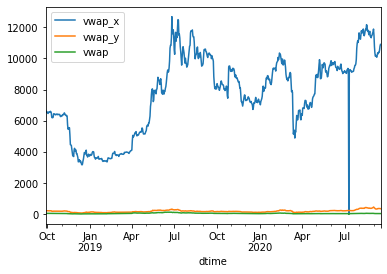

In [87]:
df.plot(y=['vwap_x', 'vwap_y', 'vwap'])

In [88]:
min(df['vwap_x'])

0.0

In [89]:
df[df['vwap_x'] == 0.0]

,time,open_x,high_x,low_x,close_x,vwap_x,volume_x,count_x,open_y,high_y,...,vwap_y,volume_y,count_y,open,high,low,close,vwap,volume,count
dtime,,,,,,,,,,,,,,,,,,,,,
2020-07-10,1594339200,9219.2,9219.2,9219.2,9219.2,0.0,0.0,0,239.93,239.93,...,238.31,0.07,1,44.14,44.14,44.14,44.14,0.0,0.0,0


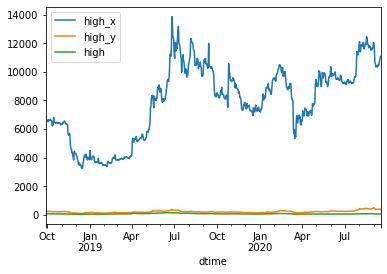

In [90]:
df.plot(y=['high_x', 'high_y', 'high'])

In [97]:
btc = pull_data("BTC")

In [98]:
btc.head()

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC
dtime,,,,,,,,
2020-09-16,1600214400,10785.2,11097.9,10670.2,10993.9,10933.5,3585.226990,27236
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159
2020-09-14,1600041600,10328.2,10740.3,10251.2,10674.9,10546.2,3699.676882,14004
2020-09-13,1599955200,10447.5,10573.0,10217.2,10328.2,10382.5,2427.791967,9501
2020-09-12,1599868800,10398.2,10475.0,10280.0,10447.5,10390.8,2068.365993,8651


In [99]:
eth = pull_data("ETH")
eth.head()

,time,open_ETH,high_ETH,low_ETH,close_ETH,vwap_ETH,volume_ETH,count_ETH
dtime,,,,,,,,
2020-09-16,1600214400,364.09,373.78,355.11,366.18,363.83,61933.172122,11256
2020-09-15,1600128000,377.14,382.48,362.50,364.09,372.49,73932.668096,14684
2020-09-14,1600041600,366.51,384.15,356.15,377.14,370.45,71149.303407,13967
2020-09-13,1599955200,387.94,390.00,353.50,366.41,369.92,87789.551251,14501
2020-09-12,1599868800,373.88,388.00,365.31,387.91,376.46,48281.889669,10050


In [100]:
ltc = pull_data("LTC")
ltc.head()

,time,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC
dtime,,,,,,,,
2020-09-16,1600214400,48.31,48.76,46.98,48.17,47.96,25330.260657,1768
2020-09-15,1600128000,49.09,50.31,48.18,48.31,49.00,32381.530226,2143
2020-09-14,1600041600,48.16,49.61,47.16,49.09,48.28,21508.431490,1818
2020-09-13,1599955200,50.82,50.94,47.30,48.17,49.13,23571.989664,1572
2020-09-12,1599868800,48.98,51.31,48.43,50.82,49.86,14343.969944,1087


In [101]:
dfs = [btc, eth, ltc]

In [102]:
df = merge_data(dfs)

In [103]:
df.head()

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,open_ETH,high_ETH,...,vwap_ETH,volume_ETH,count_ETH,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-16,1600214400,10785.2,11097.9,10670.2,10993.9,10933.5,3585.226990,27236,364.09,373.78,...,363.83,61933.172122,11256,48.31,48.76,46.98,48.17,47.96,25330.260657,1768
2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,377.14,382.48,...,372.49,73932.668096,14684,49.09,50.31,48.18,48.31,49.00,32381.530226,2143
2020-09-14,1600041600,10328.2,10740.3,10251.2,10674.9,10546.2,3699.676882,14004,366.51,384.15,...,370.45,71149.303407,13967,48.16,49.61,47.16,49.09,48.28,21508.431490,1818
2020-09-13,1599955200,10447.5,10573.0,10217.2,10328.2,10382.5,2427.791967,9501,387.94,390.00,...,369.92,87789.551251,14501,50.82,50.94,47.30,48.17,49.13,23571.989664,1572
2020-09-12,1599868800,10398.2,10475.0,10280.0,10447.5,10390.8,2068.365993,8651,373.88,388.00,...,376.46,48281.889669,10050,48.98,51.31,48.43,50.82,49.86,14343.969944,1087


In [108]:
doge = pull_data("XDG")

In [109]:
doge.head()

,time,open_XDG,high_XDG,low_XDG,close_XDG,vwap_XDG,volume_XDG,count_XDG
dtime,,,,,,,,
2020-09-16,1600214400,0.002837,0.002849,0.002782,0.002798,0.002812,1.678851e+07,178
2020-09-15,1600128000,0.002786,0.002887,0.002778,0.002837,0.002827,1.791031e+07,254
2020-09-14,1600041600,0.002768,0.002810,0.002742,0.002786,0.002767,1.301891e+07,106
2020-09-13,1599955200,0.002803,0.002808,0.002742,0.002775,0.002769,1.357929e+07,158
2020-09-12,1599868800,0.002789,0.002824,0.002761,0.002803,0.002794,1.956070e+07,185
